In [29]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import time

In [30]:
spark = SparkSession.builder.appName("SparkSQLApp").getOrCreate()
sizes = []
times = []

for i in range(1, 6):
    start_time = time.time()
    
    filepath = f"""gs://dataproc-temp-northamerica-northeast2-519948775205-ddzth4i5/path/data{i}.csv"""
    df = (spark.read.format("csv")
            .option("inferSchema", "true")
            .option("header", "true")
            .load(filepath))
    row_count = df.count()
    sizes.append(row_count)
    (df.select("id")
            .filter("id > 1")
            .orderBy("id", ascending=False))
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    

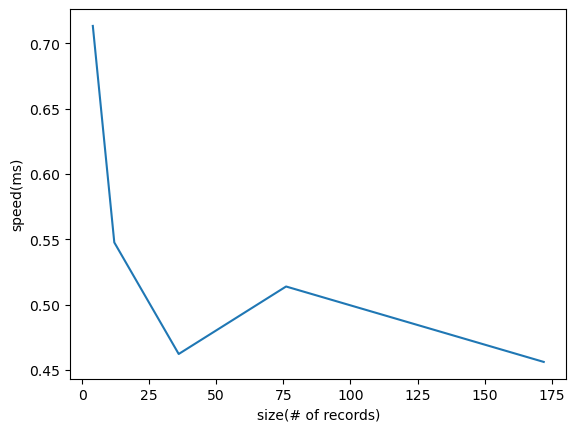

In [32]:
fig, ax = plt.subplots()
ax.plot(sizes, times)
ax.set_xlabel("size(# of records)")
ax.set_ylabel("speed(ms)")
plt.show()